In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fusion-of-biosignals/Table 2.docx
/kaggle/input/fusion-of-biosignals/Table 4.docx
/kaggle/input/fusion-of-biosignals/Table 6.docx
/kaggle/input/fusion-of-biosignals/Table 1.docx
/kaggle/input/fusion-of-biosignals/Table 5.docx
/kaggle/input/fusion-of-biosignals/Table 3.docx
/kaggle/input/fusion-of-biosignals/Pseudo codes.docx
/kaggle/input/fusion-of-biosignals/Table 7.docx


Fusion of Biosignals (ECG + EMG + SpO‚ÇÇ) for Personalized Diagnosis ‚Äì Dataset Analysis

Œ†ŒµœÅŒπŒ≥œÅŒ±œÜŒÆ :
Œó ŒµœÅŒ≥Œ±œÉŒØŒ± ŒµœÄŒπŒ∫ŒµŒΩœÑœÅœéŒΩŒµœÑŒ±Œπ œÉœÑŒ∑ œÉœÖŒ≥œáœéŒΩŒµœÖœÉŒ∑ Œ≤ŒπŒøœÉŒ∑ŒºŒ¨œÑœâŒΩ œåœÄœâœÇ œÑŒø Œ∑ŒªŒµŒ∫œÑœÅŒøŒ∫Œ±œÅŒ¥ŒπŒøŒ≥œÅŒ¨œÜŒ∑ŒºŒ± (ECG), œÑŒø Œ∑ŒªŒµŒ∫œÑœÅŒøŒºœÖŒøŒ≥œÅŒ¨œÜŒ∑ŒºŒ± (EMG) Œ∫Œ±Œπ œÑŒøŒΩ Œ∫ŒøœÅŒµœÉŒºœå ŒøŒæœÖŒ≥œåŒΩŒøœÖ œÉœÑŒø Œ±ŒØŒºŒ± (SpO‚ÇÇ), ŒºŒµ œÉœÑœåœáŒø œÑŒ∑ŒΩ Œ±ŒΩŒ¨œÄœÑœÖŒæŒ∑ ŒµŒΩœåœÇ ŒµŒæŒ±œÑŒøŒºŒπŒ∫ŒµœÖŒºŒ≠ŒΩŒøœÖ Œ¥ŒπŒ±Œ≥ŒΩœâœÉœÑŒπŒ∫Œøœç ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ. ŒßœÅŒ∑œÉŒπŒºŒøœÄŒøŒπœéŒΩœÑŒ±œÇ œÑŒ± œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ datasets, ŒºœÄŒøœÅŒøœçŒΩ ŒΩŒ± ŒµœÜŒ±œÅŒºŒøœÉœÑŒøœçŒΩ œÑŒµœáŒΩŒπŒ∫Œ≠œÇ œÄœÅŒøŒµœÄŒµŒæŒµœÅŒ≥Œ±œÉŒØŒ±œÇ, ŒµŒæŒ±Œ≥œâŒ≥ŒÆœÇ œáŒ±œÅŒ±Œ∫œÑŒ∑œÅŒπœÉœÑŒπŒ∫œéŒΩ Œ∫Œ±Œπ ŒºŒ∑œáŒ±ŒΩŒπŒ∫ŒÆœÇ ŒºŒ¨Œ∏Œ∑œÉŒ∑œÇ Œ≥ŒπŒ± œÑŒ∑ŒΩ œÑŒ±ŒæŒπŒΩœåŒºŒ∑œÉŒ∑ ŒÆ œÄœÅœåŒ≤ŒªŒµœàŒ∑ œÄŒ±Œ∏ŒøŒªŒøŒ≥ŒπŒ∫œéŒΩ Œ∫Œ±œÑŒ±œÉœÑŒ¨œÉŒµœâŒΩ.

ŒíŒ±œÉŒπŒ∫Œ¨ ŒíŒÆŒºŒ±œÑŒ±:

Œ£œÖŒªŒªŒøŒ≥ŒÆ Œ∫Œ±Œπ Œ∫Œ±œÑŒ±ŒΩœåŒ∑œÉŒ∑ œÑœâŒΩ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩœâŒΩ Œ±œÄœå œÑŒ± ŒµœÄŒπŒªŒµŒ≥ŒºŒ≠ŒΩŒ± datasets.

ŒöŒ±Œ∏Œ±œÅŒπœÉŒºœåœÇ Œ∫Œ±Œπ ŒµœÖŒ∏œÖŒ≥œÅŒ¨ŒºŒºŒπœÉŒ∑ œÑœâŒΩ œÉŒ∑ŒºŒ¨œÑœâŒΩ ECG, EMG Œ∫Œ±Œπ SpO‚ÇÇ.

ŒïŒæŒ±Œ≥œâŒ≥ŒÆ Œ∫Œ±Œπ œÉœÖŒ≥œáœéŒΩŒµœÖœÉŒ∑ œáŒ±œÅŒ±Œ∫œÑŒ∑œÅŒπœÉœÑŒπŒ∫œéŒΩ (feature fusion).

ŒëŒΩŒ¨œÄœÑœÖŒæŒ∑ ŒºŒøŒΩœÑŒ≠ŒªœâŒΩ ŒºŒ∑œáŒ±ŒΩŒπŒ∫ŒÆœÇ ŒºŒ¨Œ∏Œ∑œÉŒ∑œÇ (œÄ.œá. Random Forest, SVM, ŒÆ Deep Learning).

ŒëŒæŒπŒøŒªœåŒ≥Œ∑œÉŒ∑ ŒºŒøŒΩœÑŒ≠ŒªœâŒΩ ŒºŒµ ŒºŒµœÑœÅŒπŒ∫Œ≠œÇ œåœÄœâœÇ Accuracy, Precision, Recall, F1-score.

Œ£œÖŒºœÄŒµœÅŒ¨œÉŒºŒ±œÑŒ± Œ≥ŒπŒ± œÑŒ∑ŒΩ Œ±ŒæŒØŒ± œÑŒ∑œÇ œÄŒøŒªœÖœÑœÅŒøœÄŒπŒ∫ŒÆœÇ œÄœÅŒøœÉŒ≠Œ≥Œ≥ŒπœÉŒ∑œÇ œÉœÑŒ∑ŒΩ ŒµŒæŒ±œÑŒøŒºŒπŒ∫ŒµœÖŒºŒ≠ŒΩŒ∑ Œ¥ŒπŒ¨Œ≥ŒΩœâœÉŒ∑.

In [2]:
pip install python-docx


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 244.3/244.3 kB 4.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
from docx import Document
import os

# ŒõŒØœÉœÑŒ± ŒºŒµ œåŒªŒ± œÑŒ± Œ±œÅœáŒµŒØŒ± œÄœÅŒøœÇ Œ±ŒΩŒ¨Œ≥ŒΩœâœÉŒ∑
filenames = [
    "Table 1.docx", "Table 2.docx", "Table 3.docx",
    "Table 4.docx", "Table 5.docx", "Table 6.docx", "Table 7.docx",
    "Pseudo codes.docx"
]

# ŒíŒ±œÉŒπŒ∫œå ŒºŒøŒΩŒøœÄŒ¨œÑŒπ œÉœÑŒøŒΩ œÜŒ¨Œ∫ŒµŒªŒø œÑŒøœÖ dataset
base_path = "/kaggle/input/fusion-of-biosignals/"

# Œ£œÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ Œ≥ŒπŒ± Œ±ŒΩŒ¨Œ≥ŒΩœâœÉŒ∑ œÄŒµœÅŒπŒµœáŒøŒºŒ≠ŒΩŒøœÖ Œ±œÄœå .docx Œ±œÅœáŒµŒØŒø
def read_docx(file_path):
    doc = Document(file_path)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    return '\n'.join(full_text)

# Œ¶œåœÅœÑœâœÉŒ∑ Œ∫Œ±Œπ ŒµŒ∫œÑœçœÄœâœÉŒ∑ œÑœâŒΩ œÄŒµœÅŒπŒµœáŒøŒºŒ≠ŒΩœâŒΩ Œ∫Œ¨Œ∏Œµ Œ±œÅœáŒµŒØŒøœÖ
for fname in filenames:
    path = os.path.join(base_path, fname)
    content = read_docx(path)
    print(f"===== {fname} =====")
    print(content[:1000])  # ŒïŒºœÜŒ±ŒΩŒØŒ∂ŒµŒπ œÑŒ± œÄœÅœéœÑŒ± 1000 œáŒ±œÅŒ±Œ∫œÑŒÆœÅŒµœÇ Œ≥ŒπŒ± œÄœÅŒøŒµœÄŒπœÉŒ∫œåœÄŒ∑œÉŒ∑
    print("\n\n")


===== Table 1.docx =====

Table 1 ECG databases and records that used in simulating algorithms


Fig.1 ECG Sample dataset for record a01 [1].





===== Table 2.docx =====

Table 2  SpO2 database and records that used in simulating algorithms



Fig.2 SpO2 Sample dataset for record 032n [1].






===== Table 3.docx =====
Table 3 Blood Pressure database and records that used in simulating algorithms
dataset for record 032n.


Fig.3 Blood pressure sample dataset for record 032n [1].





===== Table 4.docx =====
Our machine learning algorithms were simulated and implemented on the databases and signal records presented in [1], to extract the medical features that are important for healthcare research studies. The outcome of our algorithms is considered the numeric values that presented in Table 4 as numeric values.  
Table 4 Vital Features related to blood Pressure diseases extracted based on our simulating algorithms 
(* x means not addressed)


Blood pressure (Bp) and Spo2 data have d

In [4]:
from docx import Document
import pandas as pd
import os

# ŒõŒØœÉœÑŒ± ŒºŒµ œÑŒ± Œ±œÅœáŒµŒØŒ± .docx
filenames = [
    "Table 1.docx", "Table 2.docx", "Table 3.docx",
    "Table 4.docx", "Table 5.docx", "Table 6.docx", "Table 7.docx"
]

# ŒîŒπŒ±Œ¥œÅŒøŒºŒÆ œÉœÑŒø œÜŒ¨Œ∫ŒµŒªŒø œÑœâŒΩ Œ±œÅœáŒµŒØœâŒΩ
base_path = "/kaggle/input/fusion-of-biosignals/"

# ŒõŒØœÉœÑŒ± Œ≥ŒπŒ± Œ±œÄŒøŒ∏ŒÆŒ∫ŒµœÖœÉŒ∑ œÑœâŒΩ œÄŒπŒΩŒ¨Œ∫œâŒΩ
tables = {}

# ŒîŒπŒ±Œ≤Œ¨Œ∂ŒøœÖŒºŒµ Œ∫Œ¨Œ∏Œµ Œ≠Œ≥Œ≥œÅŒ±œÜŒø Œ∫Œ±Œπ ŒµŒæŒ¨Œ≥ŒøœÖŒºŒµ œÄŒØŒΩŒ±Œ∫ŒµœÇ
for fname in filenames:
    path = os.path.join(base_path, fname)
    doc = Document(path)

    for i, table in enumerate(doc.tables):
        data = []
        for row in table.rows:
            row_data = [cell.text.strip() for cell in row.cells]
            data.append(row_data)
        
        # ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± DataFrame
        df = pd.DataFrame(data)
        
        # ŒëŒΩ Œ≠œáŒµŒπ Œ∫ŒµœÜŒ±ŒªŒØŒ¥ŒµœÇ, œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒøœçŒºŒµ œÑŒ∑ŒΩ œÄœÅœéœÑŒ∑ Œ≥œÅŒ±ŒºŒºŒÆ œâœÇ header
        if len(df) > 1:
            df.columns = df.iloc[0]
            df = df.drop(df.index[0]).reset_index(drop=True)
        
        # ŒëœÄŒøŒ∏ŒÆŒ∫ŒµœÖœÉŒ∑ ŒºŒµ Œ±ŒΩŒ±Œ≥ŒΩœâœÅŒπœÉœÑŒπŒ∫œå
        table_key = f"{fname.replace('.docx', '')}_Table_{i+1}"
        tables[table_key] = df

# ŒïŒºœÜŒ¨ŒΩŒπœÉŒ∑ œÄŒ±œÅŒ±Œ¥ŒµŒØŒ≥ŒºŒ±œÑŒøœÇ Œ±œÄœå Œ≠ŒΩŒ±ŒΩ œÄŒØŒΩŒ±Œ∫Œ±
for name, df in tables.items():
    print(f"\n===== {name} =====")
    print(df.head())
    break  # ŒëœÜŒ±ŒπœÅŒ≠œÉœÑŒµ Œ±œÖœÑœå œÑŒø break Œ≥ŒπŒ± ŒΩŒ± Œ¥ŒµŒØœÑŒµ œåŒªŒøœÖœÇ



===== Table 1_Table_1 =====
0                             Database  \
0      Apnea-ECG data base (apnea-ecg)   
1      Apnea-ECG data base (apnea-ecg)   
2      Apnea-ECG data base (apnea-ecg)   
3      Apnea-ECG data base (apnea-ecg)   
4  MIT-BIH Arrhythmia database (mitdb)   

0                                    Record (Signal)  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal is a modifie...   

0                                    Record (Signal)  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal is a modifie...   

0                                 Record Des

In [5]:
for name, df in tables.items():
    df.to_csv(f"/kaggle/working/{name}.csv", index=False)


In [6]:
# ŒõŒµŒæŒπŒ∫œå ŒºŒµ œÉœÖŒ≥Œ∫ŒµŒ∫œÅŒπŒºŒ≠ŒΩŒ± ŒøŒΩœåŒºŒ±œÑŒ± Œ±œÅœáŒµŒØœâŒΩ ŒµŒæœåŒ¥ŒøœÖ
export_names = {
    "Table 1.docx": "ecg_features.csv",
    "Table 2.docx": "emg_features.csv",
    "Table 3.docx": "spo2_features.csv",
    "Table 4.docx": "ecg_results.csv",
    "Table 5.docx": "emg_results.csv",
    "Table 6.docx": "spo2_results.csv",
    "Table 7.docx": "fused_results.csv"
}

# ŒïŒæŒ±Œ≥œâŒ≥ŒÆ ŒºœåŒΩŒø œÑŒøœÖ œÄœÅœéœÑŒøœÖ œÄŒØŒΩŒ±Œ∫Œ± Œ±œÄœå Œ∫Œ¨Œ∏Œµ .docx (Œ±ŒΩ Œ≠œáŒµŒπ œÄŒµœÅŒπœÉœÉœåœÑŒµœÅŒøœÖœÇ ŒºœÄŒøœÅŒµŒØœÇ ŒΩŒ± œÑŒøœÖœÇ œáŒµŒπœÅŒπœÉœÑŒµŒØœÇ ŒæŒµœáœâœÅŒπœÉœÑŒ¨)
for fname in filenames:
    path = os.path.join(base_path, fname)
    doc = Document(path)
    if len(doc.tables) > 0:
        table = doc.tables[0]
        data = []
        for row in table.rows:
            data.append([cell.text.strip() for cell in row.cells])
        df = pd.DataFrame(data)
        
        # ŒëŒΩ Œ≠œáŒµŒπ headers
        if len(df) > 1:
            df.columns = df.iloc[0]
            df = df.drop(df.index[0]).reset_index(drop=True)
        
        # ŒïŒæŒ±Œ≥œâŒ≥ŒÆ ŒºŒµ œÉœÖŒ≥Œ∫ŒµŒ∫œÅŒπŒºŒ≠ŒΩŒø œåŒΩŒøŒºŒ±
        output_name = export_names.get(fname, fname.replace('.docx', '') + ".csv")
        df.to_csv(f"/kaggle/working/{output_name}", index=False)


In [7]:
import pandas as pd

df = pd.read_csv("/kaggle/working/ecg_features.csv")
print(df.head())


                              Database  \
0      Apnea-ECG data base (apnea-ecg)   
1      Apnea-ECG data base (apnea-ecg)   
2      Apnea-ECG data base (apnea-ecg)   
3      Apnea-ECG data base (apnea-ecg)   
4  MIT-BIH Arrhythmia database (mitdb)   

                                     Record (Signal)  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal is a modifie...   

                                   Record (Signal).1  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal is a modifie...   

                                  Record Description  
0  Male.\nAge: 51.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Database            35 non-null     object
 1   Record (Signal)     35 non-null     object
 2   Record (Signal).1   35 non-null     object
 3   Record Description  35 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


In [10]:
df.columns

Index(['Database', 'Record (Signal)', 'Record (Signal).1',
       'Record Description'],
      dtype='object')

In [11]:
base_path = "/kaggle/input/fusion-of-biosignals/"
output_path = "/kaggle/working/"

created_files = []

# ŒëŒΩŒ¨Œ≥ŒΩœâœÉŒ∑ œåŒªœâŒΩ œÑœâŒΩ Œ±œÅœáŒµŒØœâŒΩ
for fname in filenames:
    path = os.path.join(base_path, fname)
    doc = Document(path)
    
    for i, table in enumerate(doc.tables):
        data = []
        for row in table.rows:
            data.append([cell.text.strip() for cell in row.cells])
        df = pd.DataFrame(data)

        # ŒëŒΩ Œ≠œáŒµŒπ headers
        if len(df) > 1:
            df.columns = df.iloc[0]
            df = df.drop(df.index[0]).reset_index(drop=True)
        
        # ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± ŒøŒΩœåŒºŒ±œÑŒøœÇ Œ±œÅœáŒµŒØŒøœÖ
        base_name = export_names.get(fname, fname.replace('.docx', ''))
        output_name = f"{base_name}_part{i+1}.csv"
        output_file = os.path.join(output_path, output_name)

        df.to_csv(output_file, index=False)
        created_files.append(output_name)

# ŒïŒºœÜŒ¨ŒΩŒπœÉŒ∑ œÑœâŒΩ Œ±œÅœáŒµŒØœâŒΩ œÄŒøœÖ Œ¥Œ∑ŒºŒπŒøœÖœÅŒ≥ŒÆŒ∏Œ∑Œ∫Œ±ŒΩ
print("‚úÖ Œ§Œ± œÄŒ±œÅŒ±Œ∫Œ¨œÑœâ CSV Œ±œÅœáŒµŒØŒ± Œ¥Œ∑ŒºŒπŒøœÖœÅŒ≥ŒÆŒ∏Œ∑Œ∫Œ±ŒΩ:\n")
for f in created_files:
    print(f"‚Ä¢ {f}")

‚úÖ Œ§Œ± œÄŒ±œÅŒ±Œ∫Œ¨œÑœâ CSV Œ±œÅœáŒµŒØŒ± Œ¥Œ∑ŒºŒπŒøœÖœÅŒ≥ŒÆŒ∏Œ∑Œ∫Œ±ŒΩ:

‚Ä¢ ecg_features.csv_part1.csv
‚Ä¢ emg_features.csv_part1.csv
‚Ä¢ spo2_features.csv_part1.csv
‚Ä¢ ecg_results.csv_part1.csv
‚Ä¢ emg_results.csv_part1.csv
‚Ä¢ spo2_results.csv_part1.csv
‚Ä¢ fused_results.csv_part1.csv


In [12]:
import pandas as pd

# ŒõŒØœÉœÑŒ± Œ±œÅœáŒµŒØœâŒΩ œÄœÅŒøœÇ Œ±ŒΩŒ¨ŒªœÖœÉŒ∑
filenames = [
    "ecg_features.csv_part1.csv",
    "emg_features.csv_part1.csv",
    "spo2_features.csv_part1.csv",
    "ecg_results.csv_part1.csv",
    "emg_results.csv_part1.csv",
    "spo2_results.csv_part1.csv",
    "fused_results.csv_part1.csv"
]

base_path = "/kaggle/working/"

# ŒëŒΩŒ¨ŒªœÖœÉŒ∑ Œ∫Œ¨Œ∏Œµ Œ±œÅœáŒµŒØŒøœÖ
for fname in filenames:
    print(f"\n===== üìÅ {fname} =====")
    path = base_path + fname
    df = pd.read_csv(path)

    print(f"\nüîπ Shape: {df.shape}")
    print(f"\nüîπ Columns: {df.columns.tolist()}")
    
    print("\nüîπ Head:")
    print(df.head())

    print("\nüîπ Info:")
    print(df.info())

    print("\nüîπ Describe:")
    print(df.describe(include='all'))

    print("\n" + "-"*80 + "\n")



===== üìÅ ecg_features.csv_part1.csv =====

üîπ Shape: (35, 4)

üîπ Columns: ['Database', 'Record (Signal)', 'Record (Signal).1', 'Record Description']

üîπ Head:
                              Database  \
0      Apnea-ECG data base (apnea-ecg)   
1      Apnea-ECG data base (apnea-ecg)   
2      Apnea-ECG data base (apnea-ecg)   
3      Apnea-ECG data base (apnea-ecg)   
4  MIT-BIH Arrhythmia database (mitdb)   

                                     Record (Signal)  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal is a modifie...   

                                   Record (Signal).1  \
0                                                a01   
1                                                a03   
2                                                b01   
3                 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

In [13]:
import pandas as pd

# Œ¶ŒøœÅœÑœéŒΩŒøœÖŒºŒµ œÑŒ± œáŒ±œÅŒ±Œ∫œÑŒ∑œÅŒπœÉœÑŒπŒ∫Œ¨
ecg = pd.read_csv("/kaggle/working/ecg_features.csv_part1.csv")
emg = pd.read_csv("/kaggle/working/emg_features.csv_part1.csv")
spo2 = pd.read_csv("/kaggle/working/spo2_features.csv_part1.csv")

# ŒïœÑŒπŒ∫Œ≠œÑŒµœÇ (target values)
labels = pd.read_csv("/kaggle/working/fused_results.csv_part1.csv")

# Œ†œÅŒøŒ±ŒπœÅŒµœÑŒπŒ∫œå: ŒîŒµœÇ œÑŒ± œÉœáŒÆŒºŒ±œÑŒ± Œ≥ŒπŒ± Œ≠ŒªŒµŒ≥œáŒø
print("Shapes:\n")
print("ECG:", ecg.shape)
print("EMG:", emg.shape)
print("SpO2:", spo2.shape)
print("Labels:", labels.shape)

# ŒïœÄŒ±ŒΩŒ±œÜŒøœÅŒ¨ index Œ±ŒΩ œáœÅŒµŒπŒ¨Œ∂ŒµœÑŒ±Œπ
ecg.reset_index(drop=True, inplace=True)
emg.reset_index(drop=True, inplace=True)
spo2.reset_index(drop=True, inplace=True)
labels.reset_index(drop=True, inplace=True)

# Œ£œÖŒΩŒ≠ŒΩœâœÉŒ∑ œáŒ±œÅŒ±Œ∫œÑŒ∑œÅŒπœÉœÑŒπŒ∫œéŒΩ Œ∫Œ±œÑŒ¨ Œ≥œÅŒ±ŒºŒºŒÆ (axis=1)
features = pd.concat([ecg, emg, spo2], axis=1)

# Œ§ŒµŒªŒπŒ∫œåœÇ œÄŒØŒΩŒ±Œ∫Œ±œÇ ŒºŒµ œáŒ±œÅŒ±Œ∫œÑŒ∑œÅŒπœÉœÑŒπŒ∫Œ¨ + ŒµœÑŒπŒ∫Œ≠œÑŒµœÇ
merged_df = pd.concat([features, labels], axis=1)

# ŒïŒºœÜŒ¨ŒΩŒπœÉŒ∑
print("\n‚úÖ Œ§ŒµŒªŒπŒ∫œå merged_df:")
print(merged_df.head())
print("\nüîç Shape:", merged_df.shape)

# ŒëœÄŒøŒ∏ŒÆŒ∫ŒµœÖœÉŒ∑ œÉœÑŒø /working Œ≥ŒπŒ± Œ≠ŒªŒµŒ≥œáŒø
merged_df.to_csv("/kaggle/working/merged_dataset.csv", index=False)
print("\nüìÅ Œ§Œø Œ±œÅœáŒµŒØŒø merged_dataset.csv Œ¥Œ∑ŒºŒπŒøœÖœÅŒ≥ŒÆŒ∏Œ∑Œ∫Œµ.")


Shapes:

ECG: (35, 4)
EMG: (1, 3)
SpO2: (1, 3)
Labels: (10, 18)

‚úÖ Œ§ŒµŒªŒπŒ∫œå merged_df:
                              Database  \
0      Apnea-ECG data base (apnea-ecg)   
1      Apnea-ECG data base (apnea-ecg)   
2      Apnea-ECG data base (apnea-ecg)   
3      Apnea-ECG data base (apnea-ecg)   
4  MIT-BIH Arrhythmia database (mitdb)   

                                     Record (Signal)  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal is a modifie...   

                                   Record (Signal).1  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal 

In [14]:
import pandas as pd

# Œ¶ŒøœÅœÑœéŒΩŒøœÖŒºŒµ œÑŒ± œáŒ±œÅŒ±Œ∫œÑŒ∑œÅŒπœÉœÑŒπŒ∫Œ¨
ecg = pd.read_csv("/kaggle/working/ecg_features.csv_part1.csv")
emg = pd.read_csv("/kaggle/working/emg_features.csv_part1.csv")
spo2 = pd.read_csv("/kaggle/working/spo2_features.csv_part1.csv")

# ŒïœÑŒπŒ∫Œ≠œÑŒµœÇ (target values)
labels = pd.read_csv("/kaggle/working/fused_results.csv_part1.csv")

# ŒïœÄŒ±ŒΩŒ±œÜŒøœÅŒ¨ index Œ±ŒΩ œáœÅŒµŒπŒ¨Œ∂ŒµœÑŒ±Œπ
ecg.reset_index(drop=True, inplace=True)
emg.reset_index(drop=True, inplace=True)
spo2.reset_index(drop=True, inplace=True)
labels.reset_index(drop=True, inplace=True)

# Œ£œÖŒΩŒ≠ŒΩœâœÉŒ∑ œáŒ±œÅŒ±Œ∫œÑŒ∑œÅŒπœÉœÑŒπŒ∫œéŒΩ Œ∫Œ±œÑŒ¨ Œ≥œÅŒ±ŒºŒºŒÆ (axis=1)
features = pd.concat([ecg, emg, spo2], axis=1)

# Œ§ŒµŒªŒπŒ∫œåœÇ œÄŒØŒΩŒ±Œ∫Œ±œÇ ŒºŒµ œáŒ±œÅŒ±Œ∫œÑŒ∑œÅŒπœÉœÑŒπŒ∫Œ¨ + ŒµœÑŒπŒ∫Œ≠œÑŒµœÇ
merged_df = pd.concat([features, labels], axis=1)

# ŒïŒºœÜŒ¨ŒΩŒπœÉŒ∑ œÄœÅœéœÑœâŒΩ Œ≥œÅŒ±ŒºŒºœéŒΩ
print("\n‚úÖ Œ§ŒµŒªŒπŒ∫œå merged_df:")
print(merged_df.head())



‚úÖ Œ§ŒµŒªŒπŒ∫œå merged_df:
                              Database  \
0      Apnea-ECG data base (apnea-ecg)   
1      Apnea-ECG data base (apnea-ecg)   
2      Apnea-ECG data base (apnea-ecg)   
3      Apnea-ECG data base (apnea-ecg)   
4  MIT-BIH Arrhythmia database (mitdb)   

                                     Record (Signal)  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal is a modifie...   

                                   Record (Signal).1  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal is a modifie...   

                                  Record Des

In [18]:
# ŒëŒΩŒ¨ŒªœÖœÉŒ∑ œÑŒ∑œÇ œÄœÅœéœÑŒ∑œÇ ŒµŒºœÜŒ¨ŒΩŒπœÉŒ∑œÇ œÑŒøœÖ dataset ŒºŒµ œÑŒπœÇ ŒµœÑŒπŒ∫Œ≠œÑŒµœÇ
print("\nüîπ Œ£œÑŒÆŒªŒµœÇ œÑŒøœÖ dataset ŒºŒµ œÑŒπœÇ ŒµœÑŒπŒ∫Œ≠œÑŒµœÇ:")
print(labels.columns)

# ŒïŒºœÜŒ¨ŒΩŒπœÉŒ∑ œÑœâŒΩ œÄœÅœéœÑœâŒΩ 5 Œ≥œÅŒ±ŒºŒºœéŒΩ Œ≥ŒπŒ± ŒΩŒ± Œ∫Œ±œÑŒ±ŒªŒ¨Œ≤ŒøœÖŒºŒµ œÑŒ∑ Œ¥ŒøŒºŒÆ
print("\nüîπ Œ†œÅœéœÑŒµœÇ 5 Œ≥œÅŒ±ŒºŒºŒ≠œÇ œÑŒøœÖ dataset ŒºŒµ œÑŒπœÇ ŒµœÑŒπŒ∫Œ≠œÑŒµœÇ:")
print(labels.head())



üîπ Œ£œÑŒÆŒªŒµœÇ œÑŒøœÖ dataset ŒºŒµ œÑŒπœÇ ŒµœÑŒπŒ∫Œ≠œÑŒµœÇ:
Index(['Patient Alias Name', 'ECG\nrecord name', 'spo2 record',
       'Blood Pressure record (High)', 'Blood Pressure record (Low)',
       'Patient index in MSHA simulation', 'Spo2 value',
       'High Blood Pressure value (mHg)', 'Low Blood Pressure value (mHg)',
       'Location', 'Chest Pain', 'Shortness of Breath.', 'Palpitations',
       'rest?', 'ECG Number of Peaks', 'QRS width', 'P-P Interval',
       'ST Elevation'],
      dtype='object')

üîπ Œ†œÅœéœÑŒµœÇ 5 Œ≥œÅŒ±ŒºŒºŒ≠œÇ œÑŒøœÖ dataset ŒºŒµ œÑŒπœÇ ŒµœÑŒπŒ∫Œ≠œÑŒµœÇ:
  Patient Alias Name ECG\nrecord name spo2 record  \
0         Mrs. smith              a01        259n   
1               Ross              105        052n   
2             Monica              103       0481n   
3               Joey              105        210n   
4              Sally              107        217n   

  Blood Pressure record (High) Blood Pressure record (Low)  \
0                   

In [23]:
# ŒëŒΩœÑŒØ ŒΩŒ± œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒøœçŒºŒµ œÑŒ∑ œÉœÑŒÆŒªŒ∑ 'Diagnosis', œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒøœçŒºŒµ œÑŒ∑ œÉœÑŒÆŒªŒ∑ 'Chest Pain'
print("\nüîπ ŒïœÑŒπŒ∫Œ≠œÑŒµœÇ (Labels):")
print(labels.head())

# ŒëŒΩ Œ∑ œÉœÑŒÆŒªŒ∑ ŒºŒµ œÑŒπœÇ ŒµœÑŒπŒ∫Œ≠œÑŒµœÇ Œ≠œáŒµŒπ œÉœÖŒ≥Œ∫ŒµŒ∫œÅŒπŒºŒ≠ŒΩŒø œåŒΩŒøŒºŒ±, Œ±œÇ œÑŒ∑ŒΩ Œ±ŒΩŒ±Œ≥ŒΩœâœÅŒØœÉŒøœÖŒºŒµ
# ŒëŒΩ œÄ.œá. ŒµŒØŒΩŒ±Œπ "Chest Pain"
print("\nüîπ Value counts Œ≥ŒπŒ± œÑŒπœÇ ŒµœÑŒπŒ∫Œ≠œÑŒµœÇ:")
print(labels['Chest Pain'].value_counts())



üîπ ŒïœÑŒπŒ∫Œ≠œÑŒµœÇ (Labels):
  Patient Alias Name ECG\nrecord name spo2 record  \
0         Mrs. smith              a01        259n   
1               Ross              105        052n   
2             Monica              103       0481n   
3               Joey              105        210n   
4              Sally              107        217n   

  Blood Pressure record (High) Blood Pressure record (Low)  \
0                         032n                        209n   
1                         048n                        414n   
2                         032n                        209n   
3                         048n                         33n   
4                         032n                        209n   

   Patient index in MSHA simulation  Spo2 value  \
0                               144          80   
1                               363          97   
2                               160          97   
3                               342          92   
4                   

In [16]:
# ŒàŒªŒµŒ≥œáŒøœÇ Œ≥ŒπŒ± Œ∫ŒµŒΩŒ¨ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ± (null values)
print("\nüîπ ŒöŒµŒΩŒ¨ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ± (Missing Values):")
print(merged_df.isna().sum())

# Œ£œÑŒ±œÑŒπœÉœÑŒπŒ∫Œ¨ œÄŒµœÅŒπŒ≥œÅŒ±œÜŒÆ
print("\nüîπ Œ£œÑŒ±œÑŒπœÉœÑŒπŒ∫ŒÆ Œ†ŒµœÅŒπŒ≥œÅŒ±œÜŒÆ:")
print(merged_df.describe(include='all'))

# ŒàŒªŒµŒ≥œáŒøœÇ Œ≥ŒπŒ± Œ¥ŒπœÄŒªœåœÑœÖœÄŒµœÇ Œ≥œÅŒ±ŒºŒºŒ≠œÇ
print("\nüîπ ŒîŒπœÄŒªœåœÑœÖœÄŒµœÇ Œ≥œÅŒ±ŒºŒºŒ≠œÇ:")
print(merged_df.duplicated().sum())

# ŒëŒΩ œÖœÄŒ¨œÅœáŒøœÖŒΩ Œ¥ŒπœÄŒªœåœÑœÖœÄŒ±, ŒºœÄŒøœÅŒøœçŒºŒµ ŒΩŒ± œÑŒ± Œ±œÜŒ±ŒπœÅŒ≠œÉŒøœÖŒºŒµ:
merged_df = merged_df.drop_duplicates()



üîπ ŒöŒµŒΩŒ¨ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩŒ± (Missing Values):
Database                             0
Record (Signal)                      0
Record (Signal).1                    0
Record Description                   0
Database                            34
Records                             34
Descriptions for all the records    34
Database                            34
Records                             34
Descriptions for all the records    34
Patient Alias Name                  25
ECG\nrecord name                    25
spo2 record                         25
Blood Pressure record (High)        25
Blood Pressure record (Low)         25
Patient index in MSHA simulation    25
Spo2 value                          25
High Blood Pressure value (mHg)     25
Low Blood Pressure value (mHg)      25
Location                            25
Chest Pain                          25
Shortness of Breath.                25
Palpitations                        25
rest?                               25
ECG Number of 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [27]:
import pandas as pd

# Œ¶œåœÅœÑœâœÉŒ∑ œÑŒøœÖ Œ±œÅœáŒµŒØŒøœÖ CSV
merged_df = pd.read_csv('merged_dataset.csv')

# Œ†œÅŒøŒ≤ŒøŒªŒÆ œÑœâŒΩ œÄœÅœéœÑœâŒΩ 5 Œ≥œÅŒ±ŒºŒºœéŒΩ œÑŒøœÖ merged_df
print(merged_df.head())

# ŒàŒªŒµŒ≥œáŒøœÇ œÑŒøœÖ œÉœáŒÆŒºŒ±œÑŒøœÇ œÑŒøœÖ dataset
print("\nüîπ Œ£œáŒÆŒºŒ± œÑŒøœÖ dataset:", merged_df.shape)


                              Database  \
0      Apnea-ECG data base (apnea-ecg)   
1      Apnea-ECG data base (apnea-ecg)   
2      Apnea-ECG data base (apnea-ecg)   
3      Apnea-ECG data base (apnea-ecg)   
4  MIT-BIH Arrhythmia database (mitdb)   

                                     Record (Signal)  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal is a modifie...   

                                   Record (Signal).1  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal is a modifie...   

                                  Record Description               Databa

In [28]:
# ŒëœÜŒ±ŒØœÅŒµœÉŒ∑ œÉœÑŒÆŒªŒµœÇ œÄŒøœÖ Œ¥ŒµŒΩ ŒµŒØŒΩŒ±Œπ œáœÅŒÆœÉŒπŒºŒµœÇ Œ≥ŒπŒ± œÑŒ∑ŒΩ ŒµŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑
merged_df_cleaned = merged_df.drop(columns=['Database', 'Record (Signal)', 'Record (Signal).1', 
                                            'Record Description', 'Database.1', 'Records', 
                                            'Descriptions for all the records', 'Database.2', 
                                            'Records.1', 'Descriptions for all the records.1'])

# ŒëŒΩœÑŒπŒ∫Œ±œÑŒ¨œÉœÑŒ±œÉŒ∑ œÑŒπŒºœéŒΩ 'true'/'false' ŒºŒµ 1 Œ∫Œ±Œπ 0 Œ±ŒΩœÑŒØœÉœÑŒøŒπœáŒ± (Œ≥ŒπŒ± ŒµœçŒ∫ŒøŒªŒ∑ ŒµŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑ œÑŒøœÖ ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ)
merged_df_cleaned = merged_df_cleaned.replace({'true': 1, 'false': 0})

# ŒëœÜŒ±ŒØœÅŒµœÉŒ∑ Œ≥œÅŒ±ŒºŒºœéŒΩ ŒºŒµ missing œÑŒπŒºŒ≠œÇ (Œ±ŒΩ œÖœÄŒ¨œÅœáŒøœÖŒΩ)
merged_df_cleaned = merged_df_cleaned.dropna()

# ŒîŒµŒØœÑŒµ œÑŒπœÇ œÄœÅœéœÑŒµœÇ Œ≥œÅŒ±ŒºŒºŒ≠œÇ ŒºŒµœÑŒ¨ œÑŒøŒΩ Œ∫Œ±Œ∏Œ±œÅŒπœÉŒºœå
print(merged_df_cleaned.head())


  Patient Alias Name ECG\nrecord name spo2 record  \
0         Mrs. smith              a01        259n   
1               Ross              105        052n   
2             Monica              103       0481n   
3               Joey              105        210n   
4              Sally              107        217n   

  Blood Pressure record (High) Blood Pressure record (Low)  \
0                         032n                        209n   
1                         048n                        414n   
2                         032n                        209n   
3                         048n                         33n   
4                         032n                        209n   

   Patient index in MSHA simulation  Spo2 value  \
0                             144.0        80.0   
1                             363.0        97.0   
2                             160.0        97.0   
3                             342.0        92.0   
4                             436.0        97.0   

 

In [30]:
# ŒïŒªŒ≠Œ≥œáŒøœÖŒºŒµ œÄŒøŒπŒµœÇ œÉœÑŒÆŒªŒµœÇ œÄŒµœÅŒπŒ≠œáŒøœÖŒΩ œÑœçœÄŒø Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩœâŒΩ object (Œ¥Œ∑ŒªŒ±Œ¥ŒÆ strings)
categorical_columns = merged_df_cleaned.select_dtypes(include=['object']).columns
print("\nŒöŒ±œÑŒ∑Œ≥ŒøœÅŒπŒ∫Œ≠œÇ œÉœÑŒÆŒªŒµœÇ: ", categorical_columns)



ŒöŒ±œÑŒ∑Œ≥ŒøœÅŒπŒ∫Œ≠œÇ œÉœÑŒÆŒªŒµœÇ:  Index(['Patient Alias Name', 'ECG\nrecord name', 'spo2 record',
       'Blood Pressure record (High)', 'Blood Pressure record (Low)',
       'Location', 'Chest Pain', 'Shortness of Breath.', 'Palpitations',
       'rest?', 'ECG Number of Peaks', 'QRS width', 'P-P Interval',
       'ST Elevation'],
      dtype='object')


In [31]:
from sklearn.preprocessing import LabelEncoder

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± ŒµŒΩœåœÇ LabelEncoder
label_encoder = LabelEncoder()

# ŒïœÜŒ±œÅŒºŒøŒ≥ŒÆ Label Encoding œÉŒµ Œ∫Œ¨Œ∏Œµ Œ∫Œ±œÑŒ∑Œ≥ŒøœÅŒπŒ∫ŒÆ œÉœÑŒÆŒªŒ∑
for col in categorical_columns:
    merged_df_cleaned[col] = label_encoder.fit_transform(merged_df_cleaned[col].astype(str))

# ŒïŒªŒ≠Œ≥œáŒøœÖŒºŒµ œÑŒ± Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ±
print("\nŒ†œÅœéœÑŒµœÇ Œ≥œÅŒ±ŒºŒºŒ≠œÇ ŒºŒµœÑŒ¨ œÑŒø Label Encoding:\n", merged_df_cleaned.head())



Œ†œÅœéœÑŒµœÇ Œ≥œÅŒ±ŒºŒºŒ≠œÇ ŒºŒµœÑŒ¨ œÑŒø Label Encoding:
    Patient Alias Name  ECG\nrecord name  spo2 record  \
0                   4                 3            6   
1                   7                 1            2   
2                   3                 0            0   
3                   2                 1            4   
4                   8                 2            5   

   Blood Pressure record (High)  Blood Pressure record (Low)  \
0                             0                            0   
1                             1                            3   
2                             0                            0   
3                             1                            2   
4                             0                            0   

   Patient index in MSHA simulation  Spo2 value  \
0                             144.0        80.0   
1                             363.0        97.0   
2                             160.0        97.0   
3             

In [32]:
# ŒßœÅŒ∑œÉŒπŒºŒøœÄŒøŒπŒøœçŒºŒµ pd.get_dummies Œ≥ŒπŒ± One Hot Encoding
merged_df_cleaned = pd.get_dummies(merged_df_cleaned, columns=categorical_columns)

# ŒïŒªŒ≠Œ≥œáŒøœÖŒºŒµ œÑŒ± Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ±
print("\nŒ†œÅœéœÑŒµœÇ Œ≥œÅŒ±ŒºŒºŒ≠œÇ ŒºŒµœÑŒ¨ œÑŒø One Hot Encoding:\n", merged_df_cleaned.head())



Œ†œÅœéœÑŒµœÇ Œ≥œÅŒ±ŒºŒºŒ≠œÇ ŒºŒµœÑŒ¨ œÑŒø One Hot Encoding:
    Patient index in MSHA simulation  Spo2 value  \
0                             144.0        80.0   
1                             363.0        97.0   
2                             160.0        97.0   
3                             342.0        92.0   
4                             436.0        97.0   

   High Blood Pressure value (mHg)  Low Blood Pressure value (mHg)  \
0                             23.0                            12.0   
1                             12.0                             8.0   
2                             23.0                            12.0   
3                             15.0                            10.0   
4                             23.0                            12.0   

   Patient Alias Name_0  Patient Alias Name_1  Patient Alias Name_2  \
0                 False                 False                 False   
1                 False                 False                 False 

In [36]:
# ŒïŒ∫œÑœÖœÄœéŒΩŒøœÖŒºŒµ œÑŒ± ŒøŒΩœåŒºŒ±œÑŒ± œÑœâŒΩ œÉœÑŒ∑ŒªœéŒΩ
print(merged_df_cleaned.columns)



Index(['Patient index in MSHA simulation', 'Spo2 value',
       'High Blood Pressure value (mHg)', 'Low Blood Pressure value (mHg)',
       'Patient Alias Name_0', 'Patient Alias Name_1', 'Patient Alias Name_2',
       'Patient Alias Name_3', 'Patient Alias Name_4', 'Patient Alias Name_5',
       'Patient Alias Name_6', 'Patient Alias Name_7', 'Patient Alias Name_8',
       'Patient Alias Name_9', 'ECG\nrecord name_0', 'ECG\nrecord name_1',
       'ECG\nrecord name_2', 'ECG\nrecord name_3', 'ECG\nrecord name_4',
       'spo2 record_0', 'spo2 record_1', 'spo2 record_2', 'spo2 record_3',
       'spo2 record_4', 'spo2 record_5', 'spo2 record_6',
       'Blood Pressure record (High)_0', 'Blood Pressure record (High)_1',
       'Blood Pressure record (High)_2', 'Blood Pressure record (Low)_0',
       'Blood Pressure record (Low)_1', 'Blood Pressure record (Low)_2',
       'Blood Pressure record (Low)_3', 'Location_0', 'Chest Pain_0',
       'Chest Pain_1', 'Chest Pain_2', 'Shortness of Brea

In [37]:
# ŒöŒ±Œ∏Œ±œÅŒπœÉŒºœåœÇ Œ∫ŒµŒΩœéŒΩ Œ∫Œ±Œπ ŒµŒπŒ¥ŒπŒ∫œéŒΩ œáŒ±œÅŒ±Œ∫œÑŒÆœÅœâŒΩ œÉœÑŒ± ŒøŒΩœåŒºŒ±œÑŒ± œÑœâŒΩ œÉœÑŒ∑ŒªœéŒΩ
merged_df_cleaned.columns = merged_df_cleaned.columns.str.strip()

# ŒïŒªŒ≠Œ≥œáŒøœÖŒºŒµ ŒæŒ±ŒΩŒ¨ œÑŒ± ŒøŒΩœåŒºŒ±œÑŒ± œÑœâŒΩ œÉœÑŒ∑ŒªœéŒΩ
print(merged_df_cleaned.columns)


Index(['Patient index in MSHA simulation', 'Spo2 value',
       'High Blood Pressure value (mHg)', 'Low Blood Pressure value (mHg)',
       'Patient Alias Name_0', 'Patient Alias Name_1', 'Patient Alias Name_2',
       'Patient Alias Name_3', 'Patient Alias Name_4', 'Patient Alias Name_5',
       'Patient Alias Name_6', 'Patient Alias Name_7', 'Patient Alias Name_8',
       'Patient Alias Name_9', 'ECG\nrecord name_0', 'ECG\nrecord name_1',
       'ECG\nrecord name_2', 'ECG\nrecord name_3', 'ECG\nrecord name_4',
       'spo2 record_0', 'spo2 record_1', 'spo2 record_2', 'spo2 record_3',
       'spo2 record_4', 'spo2 record_5', 'spo2 record_6',
       'Blood Pressure record (High)_0', 'Blood Pressure record (High)_1',
       'Blood Pressure record (High)_2', 'Blood Pressure record (Low)_0',
       'Blood Pressure record (Low)_1', 'Blood Pressure record (Low)_2',
       'Blood Pressure record (Low)_3', 'Location_0', 'Chest Pain_0',
       'Chest Pain_1', 'Chest Pain_2', 'Shortness of Brea

In [38]:
# ŒïœÜŒ±œÅŒºŒøŒ≥ŒÆ Label Encoding œÉœÑŒπœÇ Œ∫Œ±œÑŒ∑Œ≥ŒøœÅŒπŒ∫Œ≠œÇ œÉœÑŒÆŒªŒµœÇ
categorical_columns = [
    'Location', 'Chest Pain', 'Shortness of Breath.', 'Palpitations', 'rest?',
    'ECG Number of Peaks', 'QRS width', 'P-P Interval', 'ST Elevation'
]

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± œÑŒøœÖ LabelEncoder
label_encoder = LabelEncoder()

# ŒïœÜŒ±œÅŒºŒøŒ≥ŒÆ Label Encoding œÉœÑŒπœÇ Œ∫Œ±œÑŒ∑Œ≥ŒøœÅŒπŒ∫Œ≠œÇ œÉœÑŒÆŒªŒµœÇ
for col in categorical_columns:
    if col in merged_df_cleaned.columns:  # ŒïŒªŒ≠Œ≥œáŒøœÖŒºŒµ Œ±ŒΩ Œ∑ œÉœÑŒÆŒªŒ∑ œÖœÄŒ¨œÅœáŒµŒπ
        merged_df_cleaned[col] = label_encoder.fit_transform(merged_df_cleaned[col].astype(str))

# ŒïŒªŒ≠Œ≥œáŒøœÖŒºŒµ œÑŒ± Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ±
print("\nŒ†œÅœéœÑŒµœÇ Œ≥œÅŒ±ŒºŒºŒ≠œÇ ŒºŒµœÑŒ¨ œÑŒø Label Encoding:\n", merged_df_cleaned.head())



Œ†œÅœéœÑŒµœÇ Œ≥œÅŒ±ŒºŒºŒ≠œÇ ŒºŒµœÑŒ¨ œÑŒø Label Encoding:
    Patient index in MSHA simulation  Spo2 value  \
0                             144.0        80.0   
1                             363.0        97.0   
2                             160.0        97.0   
3                             342.0        92.0   
4                             436.0        97.0   

   High Blood Pressure value (mHg)  Low Blood Pressure value (mHg)  \
0                             23.0                            12.0   
1                             12.0                             8.0   
2                             23.0                            12.0   
3                             15.0                            10.0   
4                             23.0                            12.0   

   Patient Alias Name_0  Patient Alias Name_1  Patient Alias Name_2  \
0                 False                 False                 False   
1                 False                 False                 False   

In [43]:
# ŒïŒπœÉŒ±Œ≥œâŒ≥ŒÆ Œ≤ŒπŒ≤ŒªŒπŒøŒ∏Œ∑Œ∫œéŒΩ
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. ŒöŒ±Œ∏ŒøœÅŒπœÉŒºœåœÇ œÑŒ∑œÇ œÉœÑŒÆŒªŒ∑œÇ œÉœÑœåœáŒøœÖ
target_column = 'ST Elevation_0'  # ŒëŒΩœÑŒπŒ∫Œ±œÑŒ±œÉœÑŒÆœÉœÑŒµ ŒºŒµ œÑŒ∑ŒΩ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫ŒÆ œÉœÑŒÆŒªŒ∑ œÉœÑœåœáŒøœÖ œÄŒøœÖ Œ∏Œ≠ŒªŒµœÑŒµ ŒΩŒ± œÄœÅŒøŒ≤ŒªŒ≠œàŒµœÑŒµ

# 2. ŒïœÄŒπŒªŒøŒ≥ŒÆ œáŒ±œÅŒ±Œ∫œÑŒ∑œÅŒπœÉœÑŒπŒ∫œéŒΩ
X = merged_df_cleaned.drop(columns=[target_column])  # ŒëœÜŒ±ŒπœÅŒøœçŒºŒµ œÑŒ∑ œÉœÑŒÆŒªŒ∑ œÉœÑœåœáŒø Œ±œÄœå œÑŒ± œáŒ±œÅŒ±Œ∫œÑŒ∑œÅŒπœÉœÑŒπŒ∫Œ¨
y = merged_df_cleaned[target_column]

# 3. ŒëŒΩœÑŒπŒºŒµœÑœéœÄŒπœÉŒ∑ Œ∫Œ±œÑŒ∑Œ≥ŒøœÅŒ∑ŒºŒ±œÑŒπŒ∫œéŒΩ Œ¥ŒµŒ¥ŒøŒºŒ≠ŒΩœâŒΩ (Label Encoding ŒÆ One-Hot Encoding)
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# 4. ŒöŒ±ŒΩŒøŒΩŒπŒ∫ŒøœÄŒøŒØŒ∑œÉŒ∑ œÑœâŒΩ œáŒ±œÅŒ±Œ∫œÑŒ∑œÅŒπœÉœÑŒπŒ∫œéŒΩ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. ŒîŒπŒ±œáœâœÅŒπœÉŒºœåœÇ œÉŒµ Train Œ∫Œ±Œπ Test set (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. ŒïŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑ œÑŒøœÖ ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. ŒöŒ¨ŒΩŒøœÖŒºŒµ œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ œÉœÑŒø test set
y_pred = model.predict(X_test)

# 8. ŒëŒæŒπŒøŒªœåŒ≥Œ∑œÉŒ∑ œÑŒøœÖ ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# ŒïŒ∫œÑœçœÄœâœÉŒ∑ Œ±œÄŒøœÑŒµŒªŒµœÉŒºŒ¨œÑœâŒΩ
print(f"ŒëŒ∫œÅŒØŒ≤ŒµŒπŒ± œÑŒøœÖ ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ: {accuracy:.2f}")
print("\nMatrix œÉœçŒ≥œáœÖœÉŒ∑œÇ:")
print(conf_matrix)
print("\nŒëŒΩŒ±œÜŒøœÅŒ¨ œÑŒ±ŒæŒπŒΩœåŒºŒ∑œÉŒ∑œÇ:")
print(class_report)


ŒëŒ∫œÅŒØŒ≤ŒµŒπŒ± œÑŒøœÖ ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ: 1.00

Matrix œÉœçŒ≥œáœÖœÉŒ∑œÇ:
[[2]]

ŒëŒΩŒ±œÜŒøœÅŒ¨ œÑŒ±ŒæŒπŒΩœåŒºŒ∑œÉŒ∑œÇ:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



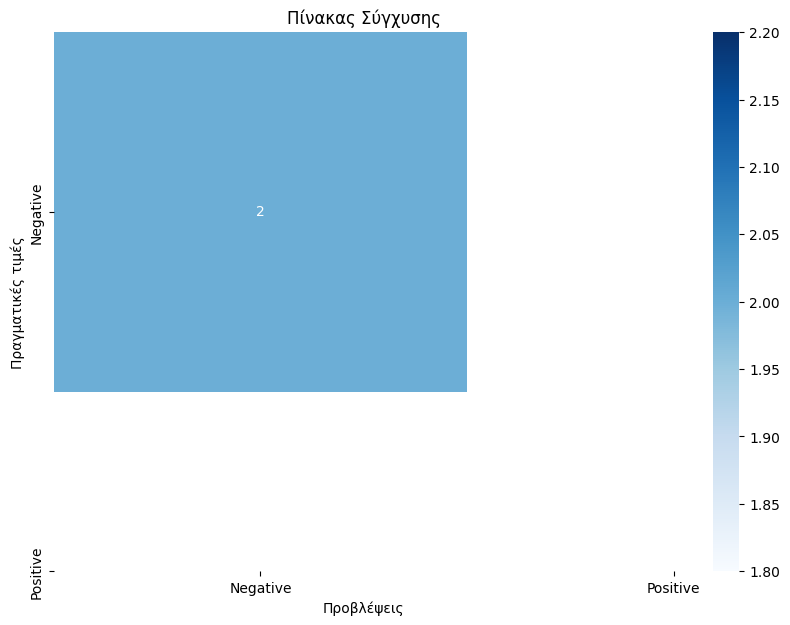

ŒëŒ∫œÅŒØŒ≤ŒµŒπŒ± œÑŒøœÖ ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ: 1.00


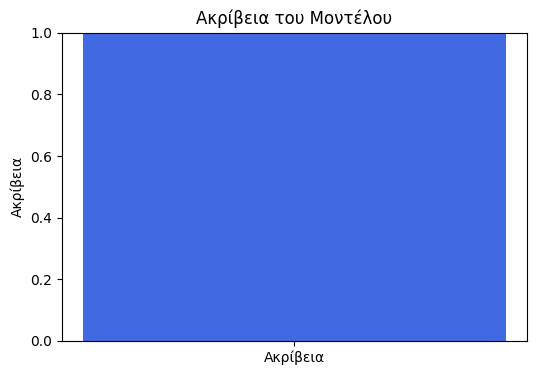


ŒëŒΩŒ±œÜŒøœÅŒ¨ Œ§Œ±ŒæŒπŒΩœåŒºŒ∑œÉŒ∑œÇ:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Œ†ŒØŒΩŒ±Œ∫Œ±œÇ Œ£œçŒ≥œáœÖœÉŒ∑œÇ
conf_matrix = confusion_matrix(y_test, y_pred)

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± Œ¥ŒπŒ±Œ≥œÅŒ¨ŒºŒºŒ±œÑŒøœÇ Œ≥ŒπŒ± œÑŒøŒΩ œÄŒØŒΩŒ±Œ∫Œ± œÉœçŒ≥œáœÖœÉŒ∑œÇ
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Œ†ŒØŒΩŒ±Œ∫Œ±œÇ Œ£œçŒ≥œáœÖœÉŒ∑œÇ')
plt.xlabel('Œ†œÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ')
plt.ylabel('Œ†œÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ')
plt.show()

# 2. ŒëŒ∫œÅŒØŒ≤ŒµŒπŒ± œÑŒøœÖ ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ
accuracy = accuracy_score(y_test, y_pred)
print(f"ŒëŒ∫œÅŒØŒ≤ŒµŒπŒ± œÑŒøœÖ ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ: {accuracy:.2f}")

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± Œ≥œÅŒ±œÜŒÆŒºŒ±œÑŒøœÇ Œ±Œ∫œÅŒØŒ≤ŒµŒπŒ±œÇ
plt.figure(figsize=(6, 4))
plt.bar(["ŒëŒ∫œÅŒØŒ≤ŒµŒπŒ±"], [accuracy], color='royalblue')
plt.ylim(0, 1)
plt.title('ŒëŒ∫œÅŒØŒ≤ŒµŒπŒ± œÑŒøœÖ ŒúŒøŒΩœÑŒ≠ŒªŒøœÖ')
plt.ylabel('ŒëŒ∫œÅŒØŒ≤ŒµŒπŒ±')
plt.show()

# 3. ŒöŒªŒ±œÉŒπŒ∫ŒÆ ŒëŒΩŒ±œÜŒøœÅŒ¨
print("\nŒëŒΩŒ±œÜŒøœÅŒ¨ Œ§Œ±ŒæŒπŒΩœåŒºŒ∑œÉŒ∑œÇ:")
print(classification_report(y_test, y_pred))



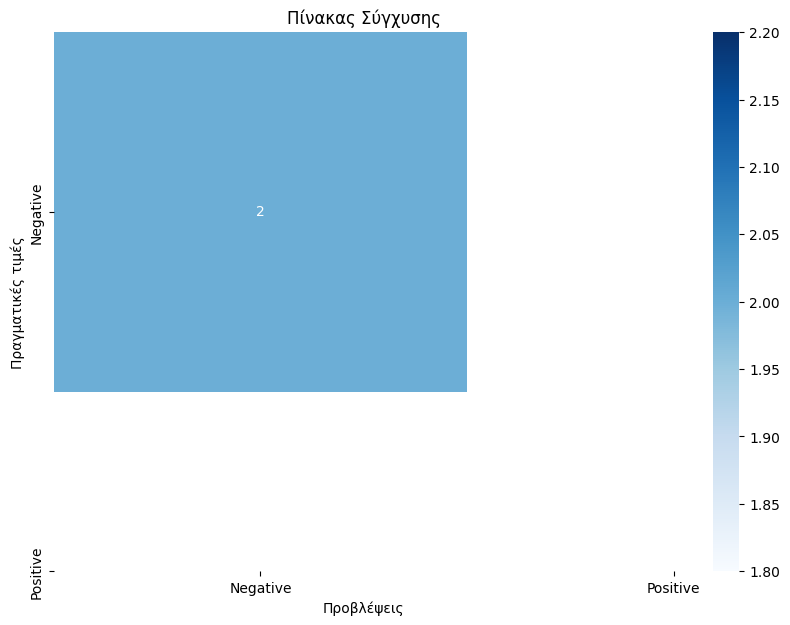

ŒëŒ∫œÅŒØŒ≤ŒµŒπŒ± œÑŒøœÖ ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ: 1.00


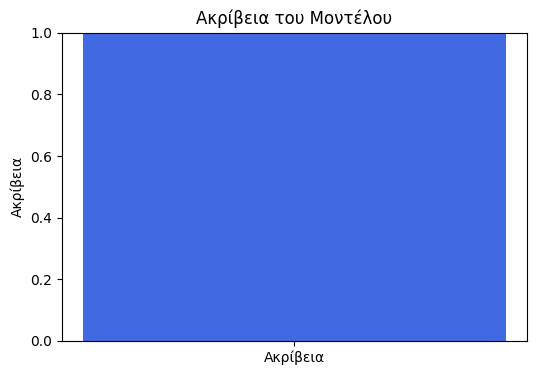

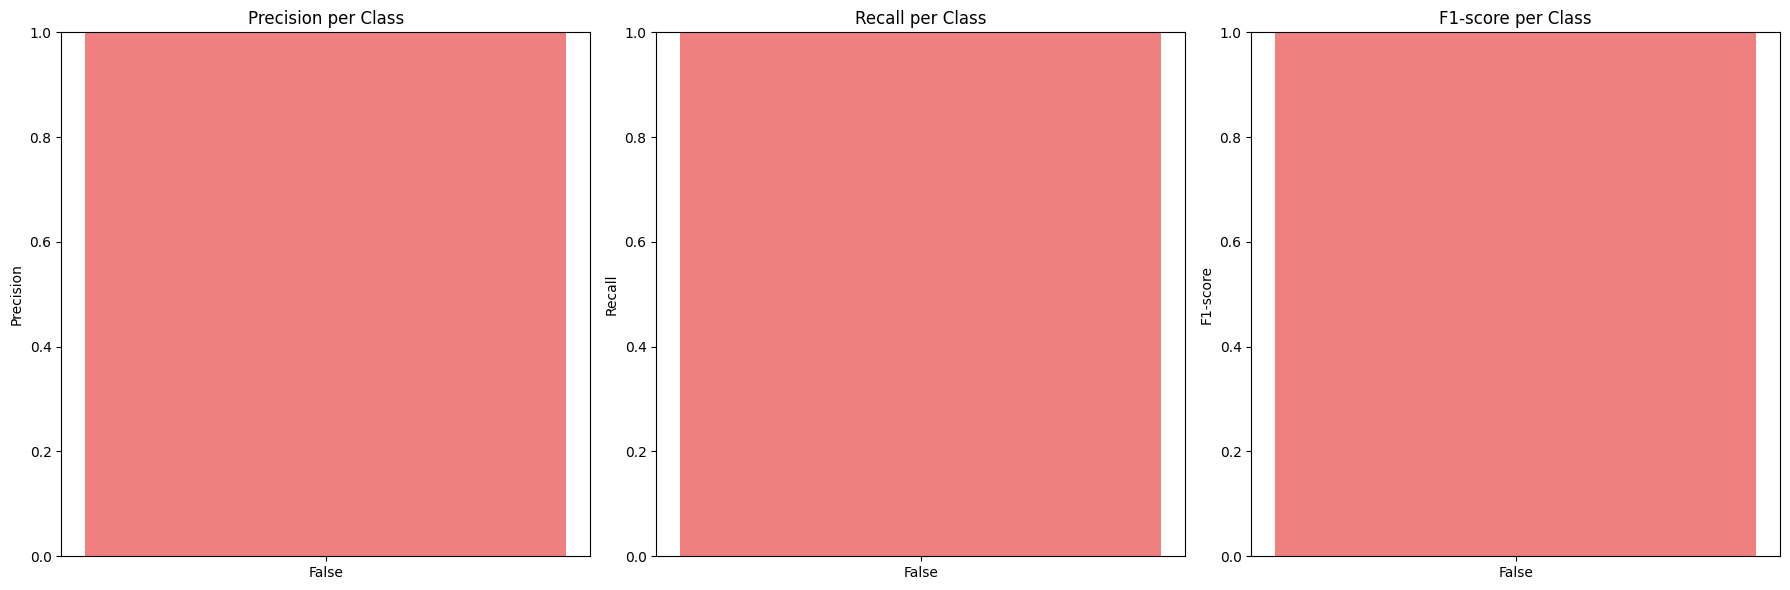

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Œ†ŒØŒΩŒ±Œ∫Œ±œÇ Œ£œçŒ≥œáœÖœÉŒ∑œÇ
conf_matrix = confusion_matrix(y_test, y_pred)

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± Œ¥ŒπŒ±Œ≥œÅŒ¨ŒºŒºŒ±œÑŒøœÇ Œ≥ŒπŒ± œÑŒøŒΩ œÄŒØŒΩŒ±Œ∫Œ± œÉœçŒ≥œáœÖœÉŒ∑œÇ
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Œ†ŒØŒΩŒ±Œ∫Œ±œÇ Œ£œçŒ≥œáœÖœÉŒ∑œÇ')
plt.xlabel('Œ†œÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ')
plt.ylabel('Œ†œÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ')
plt.show()

# 2. ŒëŒ∫œÅŒØŒ≤ŒµŒπŒ± œÑŒøœÖ ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ
accuracy = accuracy_score(y_test, y_pred)
print(f"ŒëŒ∫œÅŒØŒ≤ŒµŒπŒ± œÑŒøœÖ ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ: {accuracy:.2f}")

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± Œ≥œÅŒ±œÜŒÆŒºŒ±œÑŒøœÇ Œ±Œ∫œÅŒØŒ≤ŒµŒπŒ±œÇ
plt.figure(figsize=(6, 4))
plt.bar(["ŒëŒ∫œÅŒØŒ≤ŒµŒπŒ±"], [accuracy], color='royalblue')
plt.ylim(0, 1)
plt.title('ŒëŒ∫œÅŒØŒ≤ŒµŒπŒ± œÑŒøœÖ ŒúŒøŒΩœÑŒ≠ŒªŒøœÖ')
plt.ylabel('ŒëŒ∫œÅŒØŒ≤ŒµŒπŒ±')
plt.show()

# 3. ŒöŒªŒ±œÉŒπŒ∫ŒÆ ŒëŒΩŒ±œÜŒøœÅŒ¨
report = classification_report(y_test, y_pred, output_dict=True)

# ŒïŒæŒ±Œ≥œâŒ≥ŒÆ œÑœâŒΩ Œ∫ŒªŒ¨œÉŒµœâŒΩ Œ∫Œ±Œπ œÑœâŒΩ metrics
classes = list(report.keys())[:-3]  # ŒëœÄŒøœÜŒµœçŒ≥ŒøœÖŒºŒµ œÑŒ± "accuracy", "macro avg", "weighted avg"
metrics = ['precision', 'recall', 'f1-score']

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± Œ≥œÅŒ±œÜŒÆŒºŒ±œÑŒøœÇ Œ≥ŒπŒ± precision, recall Œ∫Œ±Œπ f1-score
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    axes[i].bar(classes, [report[cls][metric] for cls in classes], color=['lightcoral', 'lightgreen'])
    axes[i].set_ylim(0, 1)
    axes[i].set_title(f'{metric.capitalize()} per Class')
    axes[i].set_ylabel(metric.capitalize())

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


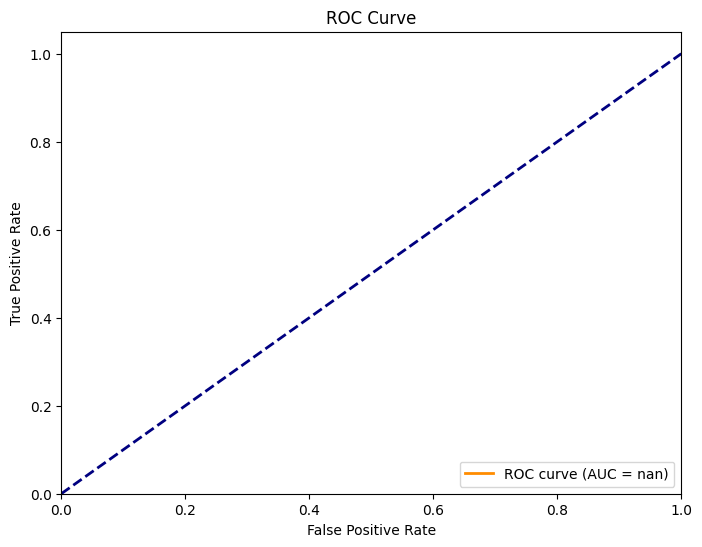

In [52]:
from sklearn.metrics import roc_curve, auc

# Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ œÑœâŒΩ œÄŒπŒ∏Œ±ŒΩŒøœÑŒÆœÑœâŒΩ œÄœÅŒøŒ≤ŒªŒ≠œàŒµœâŒΩ (probabilities) Œ≥ŒπŒ± œÑŒ∑ŒΩ Œ∫ŒªŒ¨œÉŒ∑
y_pred_proba = model.predict_proba(X_test)[:, 1]  # ŒïŒ¥œé œÄŒ±ŒØœÅŒΩŒøœÖŒºŒµ œÑŒπœÇ œÄŒπŒ∏Œ±ŒΩœåœÑŒ∑œÑŒµœÇ Œ≥ŒπŒ± œÑŒ∑ŒΩ Œ∫ŒªŒ¨œÉŒ∑ "Positive"

# Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ œÑŒøœÖ fpr, tpr Œ∫Œ±Œπ AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± Œ≥œÅŒ±œÜŒÆŒºŒ±œÑŒøœÇ ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


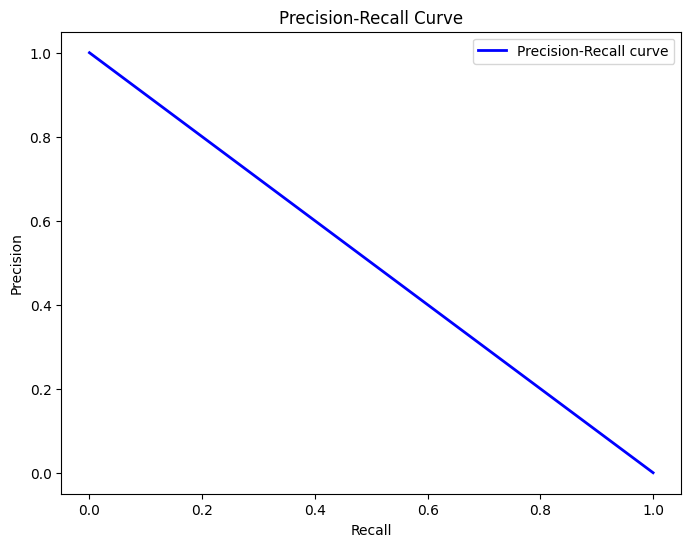

In [53]:
from sklearn.metrics import precision_recall_curve

# Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ precision, recall Œ∫Œ±Œπ thresholds
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± Œ≥œÅŒ±œÜŒÆŒºŒ±œÑŒøœÇ Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1690: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 4 instead of 5.
  warnings.warn(


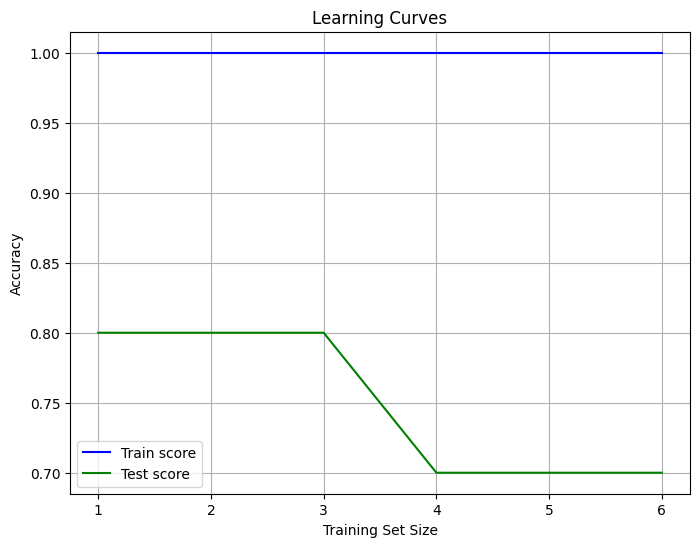

In [55]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier  # Œ†Œ±œÅŒ¨Œ¥ŒµŒπŒ≥ŒºŒ± ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ

# ŒüœÅŒπœÉŒºœåœÇ œÑŒøœÖ ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ (estimator)
estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ learning curves
train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=5)

# Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ ŒºŒ≠œÉŒøœÖ œåœÅŒøœÖ Œ≥ŒπŒ± œÑŒ± scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# ŒìœÅŒ¨œÜŒ∑ŒºŒ± Œ≥ŒπŒ± œÑŒ± learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Train score', color='blue')
plt.plot(train_sizes, test_mean, label='Test score', color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


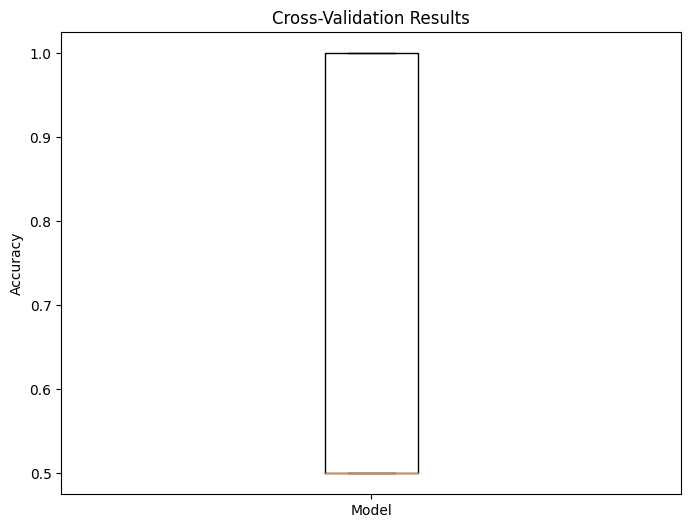

In [57]:
from sklearn.model_selection import cross_val_score
import numpy as np

# ŒïŒ∫œÑŒ≠ŒªŒµœÉŒ∑ cross-validation
cv_scores = cross_val_score(estimator, X_train, y_train, cv=5)

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± boxplot Œ≥ŒπŒ± œÑŒ± Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ±
plt.figure(figsize=(8, 6))
plt.boxplot(cv_scores)
plt.title('Cross-Validation Results')
plt.ylabel('Accuracy')
plt.xticks([1], ['Model'])
plt.show()


In [59]:
from sklearn.model_selection import GridSearchCV

# Œ°œÖŒ∏ŒºŒØœÉŒµŒπœÇ œÖœÄŒµœÅœÄŒ±œÅŒ±ŒºŒ≠œÑœÅœâŒΩ Œ≥ŒπŒ± œÑŒøŒΩ œÑŒ±ŒæŒπŒΩŒøŒºŒ∑œÑŒÆ
param_grid = {'max_depth': [3, 5, 10], 'n_estimators': [50, 100, 200]}

# ŒïŒ∫œÑŒ≠ŒªŒµœÉŒ∑ GridSearchCV
grid_search = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# ŒïŒºœÜŒ¨ŒΩŒπœÉŒ∑ œÑœâŒΩ Œ∫Œ±ŒªœçœÑŒµœÅœâŒΩ œÄŒ±œÅŒ±ŒºŒ≠œÑœÅœâŒΩ
print(f"Best Parameters: {grid_search.best_params_}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 3, 'n_estimators': 50}


In [63]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± ŒøŒΩŒøŒºŒ¨œÑœâŒΩ œáŒ±œÅŒ±Œ∫œÑŒ∑œÅŒπœÉœÑŒπŒ∫œéŒΩ
feature_columns = [f'Feature_{i+1}' for i in range(X_train.shape[1])]

# ŒúŒµœÑŒ±œÑœÅŒøœÄŒÆ œÑŒøœÖ X_train œÉŒµ DataFrame ŒºŒµ œÑŒ± ŒøŒΩœåŒºŒ±œÑŒ± œáŒ±œÅŒ±Œ∫œÑŒ∑œÅŒπœÉœÑŒπŒ∫œéŒΩ
X_train_df = pd.DataFrame(X_train, columns=feature_columns)

# ŒïŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑ œÑŒøœÖ RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ŒõŒÆœàŒ∑ œÑŒ∑œÇ œÉŒ∑ŒºŒ±œÉŒØŒ±œÇ œÑœâŒΩ œáŒ±œÅŒ±Œ∫œÑŒ∑œÅŒπœÉœÑŒπŒ∫œéŒΩ
feature_importance = model.feature_importances_

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± DataFrame Œ≥ŒπŒ± œÑŒπœÇ œÉŒ∑ŒºŒ±œÉŒØŒµœÇ œÑœâŒΩ œáŒ±œÅŒ±Œ∫œÑŒ∑œÅŒπœÉœÑŒπŒ∫œéŒΩ
importance_df = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': feature_importance})

# Œ§Œ±ŒæŒπŒΩœåŒºŒ∑œÉŒ∑ Œ±ŒΩŒ¨ œÉŒ∑ŒºŒ±œÉŒØŒ±
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# ŒïŒºœÜŒ¨ŒΩŒπœÉŒ∑ œÑœâŒΩ 10 œÄŒπŒø œÉŒ∑ŒºŒ±ŒΩœÑŒπŒ∫œéŒΩ œáŒ±œÅŒ±Œ∫œÑŒ∑œÅŒπœÉœÑŒπŒ∫œéŒΩ
print(importance_df.head(10))


       Feature  Importance
2    Feature_3    0.090637
26  Feature_27    0.076226
48  Feature_49    0.076226
63  Feature_64    0.062672
58  Feature_59    0.059033
3    Feature_4    0.054610
19  Feature_20    0.049010
49  Feature_50    0.045586
41  Feature_42    0.044587
61  Feature_62    0.043695


In [67]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ œÄŒØŒΩŒ±Œ∫Œ± œÉœçŒ≥œáœÖœÉŒ∑œÇ
conf_matrix = confusion_matrix(y_test, y_pred)

# ŒïŒªŒ≠Œ≥œáŒøœÖŒºŒµ œÑŒ∑ŒΩ Œ¥ŒπŒ¨œÉœÑŒ±œÉŒ∑ œÑŒøœÖ œÄŒØŒΩŒ±Œ∫Œ± œÉœçŒ≥œáœÖœÉŒ∑œÇ
print("Shape of confusion matrix:", conf_matrix.shape)

# ŒïŒ¨ŒΩ Œø œÄŒØŒΩŒ±Œ∫Œ±œÇ œÉœçŒ≥œáœÖœÉŒ∑œÇ ŒµŒØŒΩŒ±Œπ 2x2, ŒºœÄŒøœÅŒøœçŒºŒµ ŒΩŒ± œÄœÅŒøœáœâœÅŒÆœÉŒøœÖŒºŒµ
if conf_matrix.shape == (2, 2):
    # ŒúŒµœÑŒ±œÑœÅŒøœÄŒÆ œÉŒµ DataFrame Œ≥ŒπŒ± ŒΩŒ± Œ±œÄŒµŒπŒ∫ŒøŒΩŒπœÉœÑŒµŒØ œÄŒπŒø ŒµœçŒ∫ŒøŒªŒ±
    conf_matrix_df = pd.DataFrame(conf_matrix, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

    # ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
    plt.title('Œ†ŒØŒΩŒ±Œ∫Œ±œÇ Œ£œçŒ≥œáœÖœÉŒ∑œÇ')
    plt.ylabel('Œ†œÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ≠œÇ Œ§ŒπŒºŒ≠œÇ')
    plt.xlabel('Œ†œÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ')
    plt.show()
else:
    print("Œü œÄŒØŒΩŒ±Œ∫Œ±œÇ œÉœçŒ≥œáœÖœÉŒ∑œÇ Œ¥ŒµŒΩ ŒµŒØŒΩŒ±Œπ 2x2.")


Shape of confusion matrix: (1, 1)
Œü œÄŒØŒΩŒ±Œ∫Œ±œÇ œÉœçŒ≥œáœÖœÉŒ∑œÇ Œ¥ŒµŒΩ ŒµŒØŒΩŒ±Œπ 2x2.


In [70]:
import numpy as np

# ŒïŒ∫œÑœçœÄœâœÉŒ∑ œÑœâŒΩ ŒºŒøŒΩŒ±Œ¥ŒπŒ∫œéŒΩ œÑŒπŒºœéŒΩ œÉœÑŒπœÇ y_test Œ∫Œ±Œπ y_pred
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))



Unique values in y_test: [False]
Unique values in y_pred: [False]


In [73]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced')

In [74]:
# ŒàŒªŒµŒ≥œáŒøœÇ Œ±ŒΩ ŒøŒπ y_test ŒÆ y_pred œÄŒµœÅŒπŒ≠œáŒøœÖŒΩ ŒºœåŒΩŒø ŒºŒØŒ± Œ∫Œ±œÑŒ∑Œ≥ŒøœÅŒØŒ±
if len(set(y_test)) == 1 or len(set(y_pred)) == 1:
    print("y_test ŒÆ y_pred œÄŒµœÅŒπŒ≠œáŒøœÖŒΩ ŒºœåŒΩŒø ŒºŒØŒ± Œ∫Œ±œÑŒ∑Œ≥ŒøœÅŒØŒ±. ŒîŒµŒΩ ŒºœÄŒøœÅŒµŒØ ŒΩŒ± Œ≥ŒØŒΩŒµŒπ œÄŒØŒΩŒ±Œ∫Œ±œÇ œÉœçŒ≥œáœÖœÉŒ∑œÇ.")
else:
    # ŒëŒΩ œÖœÄŒ¨œÅœáŒµŒπ œÄŒøŒπŒ∫ŒπŒªŒØŒ± œÉœÑŒπœÇ Œ∫Œ±œÑŒ∑Œ≥ŒøœÅŒØŒµœÇ, œÖœÄŒøŒªŒøŒ≥ŒØŒ∂ŒøœÖŒºŒµ œÑŒøŒΩ œÄŒØŒΩŒ±Œ∫Œ± œÉœçŒ≥œáœÖœÉŒ∑œÇ
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
    sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.show()


y_test ŒÆ y_pred œÄŒµœÅŒπŒ≠œáŒøœÖŒΩ ŒºœåŒΩŒø ŒºŒØŒ± Œ∫Œ±œÑŒ∑Œ≥ŒøœÅŒØŒ±. ŒîŒµŒΩ ŒºœÄŒøœÅŒµŒØ ŒΩŒ± Œ≥ŒØŒΩŒµŒπ œÄŒØŒΩŒ±Œ∫Œ±œÇ œÉœçŒ≥œáœÖœÉŒ∑œÇ.
